Penplotter로 출력할 글씨를 입력해주세요 >> 
컴퓨터
[['Type2', 'ㅋ', 'ㅓ', 'ㅁ'], ['Type3', 'ㅍ', 'ㅠ'], ['Type1', 'ㅌ', 'ㅓ']]
Penplotter로 출력할 글씨를 입력해주세요 >> 


KeyboardInterrupt: Interrupted by user

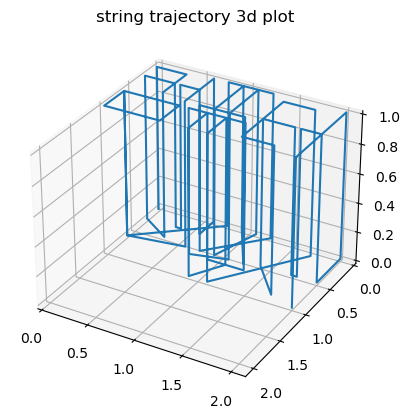

In [1]:
import time
from HangulDictionary import Hangul 
from HangulDivider import HangulDivider
import serial

Hangul = Hangul()
Divider = HangulDivider()
s = serial.Serial('COM4', 115200)

def Trajectory2Gcode(trajectory):
    for dotIndex in range(len(trajectory)):
        trajectory[dotIndex] = f"G01 X{int(trajectory[dotIndex][0])} Y{int(trajectory[dotIndex][1])} Z{0.3*int(trajectory[dotIndex][2])}"
    return trajectory
        

def SerialTx(Gcode):
    s.write(('F100' + '\n').encode())
    s.write(('G21' + '\n').encode())
    for dotIndex in range(len(Gcode)):
        s.write((Gcode[dotIndex] + '\n').encode())
        s.write(('G04 p0.5' + '\n').encode())
        return None

global loopRun

RunTime = 0
inputString = ""
Fontsize = 10
    
while True:
    startTime = time.time()
    print("Penplotter로 출력할 글씨를 입력해주세요 >> ")
    inputString = input()
    DividedHangul = Divider.Korean_String_Separater(inputString)
    TrajectoryList = Hangul.TrajectoryMaker(Fontsize, DividedHangul)
    #Hangul.stringShower(len(DividedHangul), TrajectoryList)
    Gcode = Trajectory2Gcode(TrajectoryList)
    Feedback = SerialTx(Gcode)
    endTime = time.time()
    samplingTime = endTime - startTime
    RunTime = RunTime + samplingTime
    
    